Dataset preview:
   userId  movieId  rating
0       1      101       5
1       1      102       4
2       1      103       3
3       2      101       4
4       2      104       5


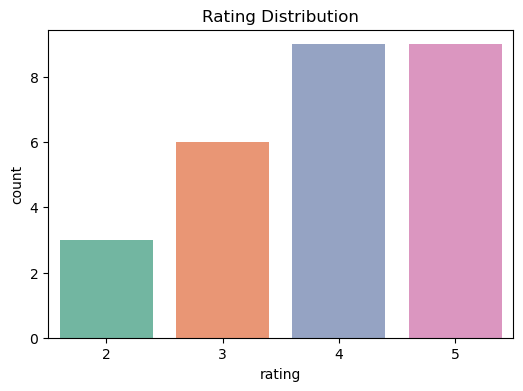


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1734  0.8293  1.4093  0.8816  1.2749  1.1137  0.2244  
MAE (testset)     1.0493  0.7332  1.3572  0.6974  1.0477  0.9770  0.2418  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    

Average RMSE: 1.1137044620511027
Average MAE: 0.9769730771061497

Top-3 movie recommendations for users:
User 1: [105, 104]
User 2: [103, 105, 102]
User 3: [104, 101]
User 4: [103, 104, 102]
User 5: [101, 102]


In [3]:
# ================================
# Task 4: Movie Recommendation System
# Collaborative Filtering (SVD)
# ================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split

# Step 2: Load Dataset
# Make sure the CSV file is inside Task4/task4_movies.csv
df = pd.read_csv("task4_movies.csv")
print("Dataset preview:")
print(df.head())

# Step 3: Data Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df, hue='rating', legend=False, palette="Set2")
plt.title("Rating Distribution")
plt.show()

# Step 4: Prepare Data for Surprise Library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Step 5: Train-Test Split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Step 6: Train SVD Model
model = SVD()
model.fit(trainset)

# Step 7: Evaluate Model using Cross Validation
print("\nEvaluating RMSE, MAE of algorithm SVD on 5 split(s).")
results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("\nAverage RMSE:", np.mean(results['test_rmse']))
print("Average MAE:", np.mean(results['test_mae']))

# Step 8: Generate Recommendations
def get_top_n_recommendations(model, df, user_ids, n=3):
    top_n = {}
    all_movie_ids = df['movieId'].unique()
    for user in user_ids:
        user_seen = df[df['userId'] == user]['movieId'].tolist()
        predictions = [model.predict(user, movie) for movie in all_movie_ids if movie not in user_seen]
        predictions.sort(key=lambda x: x.est, reverse=True)
        top_n[user] = [pred.iid for pred in predictions[:n]]
    return top_n

print("\nTop-3 movie recommendations for users:")
sample_users = df['userId'].unique()[:5]  # first 5 users
recommendations = get_top_n_recommendations(model, df, sample_users, n=3)
for user, recs in recommendations.items():
    print(f"User {user}: {recs}")


In [1]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\priyanka\ML-Internship-CodTech\Task4
